# Some basics

In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names,
                        na_values='?', comment='\t',
                        sep=' ', skipinitialspace=True)

In [3]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


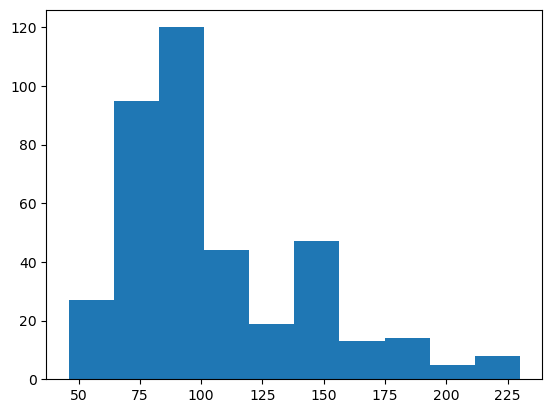

In [5]:
plt.hist(raw_dataset['Horsepower'])
plt.show()

In [6]:
raw_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

There are some nan values in the horsepower variable, fill them with median

In [8]:
raw_dataset.median()

MPG               23.0
Cylinders          4.0
Displacement     148.5
Horsepower        93.5
Weight          2803.5
Acceleration      15.5
Model Year        76.0
Origin             1.0
dtype: float64

In [9]:
raw_dataset.fillna(raw_dataset.median(),inplace=True)

In [10]:
raw_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
raw_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [33]:
data_cyl = raw_dataset[raw_dataset['Cylinders']==3]

In [34]:
data_cyl

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
71,19.0,3,70.0,97.0,2330.0,13.5,72,3
111,18.0,3,70.0,90.0,2124.0,13.5,73,3
243,21.5,3,80.0,110.0,2720.0,13.5,77,3
334,23.7,3,70.0,100.0,2420.0,12.5,80,3


# Tensorflow polynomial regression 

In [43]:
import tensorflow as tf
from scipy.optimize import minimize

In [38]:
def tru_fun(x):
    return np.cos(1.5 * np.pi * x)

In [39]:
n_samples = 30
np.random.seed(0)
x = np.sort(np.random.rand(n_samples))
y = tru_fun(x) + np.random.rand(n_samples) * 0.1
x_test = np.linspace(0,1,100)

In [40]:
plt.figure()
degrees = [1,4,15]

<Figure size 640x480 with 0 Axes>

In [41]:
def loss(p,func):
    ypred = func(list(p),x)
    return tf.reduce_mean(tf.square(ypred - y)).numpy()

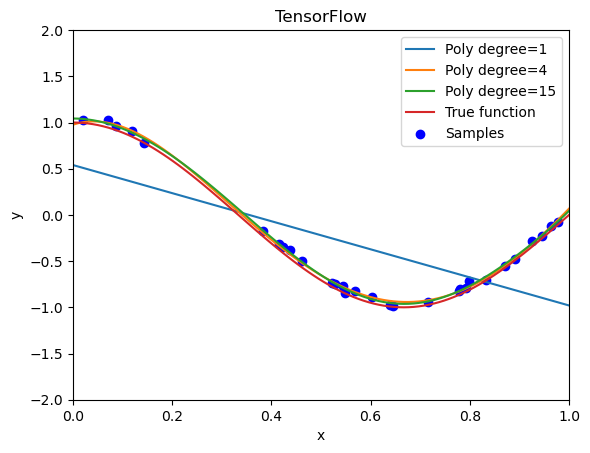

In [47]:
for degree in degrees:
    res = minimize(loss, np.zeros(degree+1), args = (tf.math.polyval), method='BFGS')
    plt.plot(x_test, np.poly1d(res.x)(x_test), label=f'Poly degree={degree}')

plt.plot(x_test, tru_fun(x_test), label="True function")
plt.scatter(x, y, color='b', label="Samples")
plt.title("TensorFlow")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([0,1])
plt.ylim([-2,2])
plt.legend()

plt.show()

# Basic Multilayer Perceptron

In [2]:
import tensorflow as tf

In [19]:
# fix random seed for tensorflow 
tf.random.set_seed(0)

# choose number of layers and nodes
n_input = 1
n_hidden1 = 5
n_hidden2 = 2
n_output = 1

#initial weights edges connecting nodes in the NN
weights = {
    'h1' : tf.Variable(tf.random.normal([n_input, n_hidden1])),
    'h2' : tf.Variable(tf.random.normal([n_hidden1,n_hidden2])),
    'out' : tf.Variable(tf.random.normal([n_hidden2,n_output]))
}

# random biases in the nodes
biases = {
    'b1' : tf.Variable(tf.random.normal([n_hidden1])),
    'b2' : tf.Variable(tf.random.normal([n_hidden2])),
    'out' : tf.Variable(tf.random.normal([n_output]))
}

Here we define the model. The activation function is a sigmoid and the variables are biased: $X\mapsto W\cdot X+ B$

In [20]:
def MLP(x):
    layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [26]:
#print predictions 
x=np.linspace(-2,2,10, dtype=np.float32).reshape(-1,1)
y1 = MLP(x)
print(MLP(x))

tf.Tensor(
[[-2.476687 ]
 [-2.5830894]
 [-2.6968765]
 [-2.7944713]
 [-2.8631544]
 [-2.9048204]
 [-2.9268866]
 [-2.9360032]
 [-2.937006 ]
 [-2.9335563]], shape=(10, 1), dtype=float32)


## Using keras sequential model

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_hidden1, activation='sigmoid', input_dim=1))
model.add(tf.keras.layers.Dense(n_hidden2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(n_output, activation='linear'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.set_weights([weights['h1'], biases['b1'],
                   weights['h2'], biases['b2'],
                   weights['out'], biases['out']])

In [25]:
y2 = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [27]:
if not np.allclose(y1,y2):
    raise ValueError('Results do NOT match!')

In [28]:
type(model)

keras.src.models.sequential.Sequential

# Some linear regression

In [70]:
def create_baseline_model() -> "tf.keras.models.Sequential":
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
                  loss='mean_squared_error')
    return model

In [71]:
def create_nn_model() -> "tf.keras.models.Sequential":
    model = model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, input_dim=1, activation = 'relu'))
    model.add(tf.keras.layers.Dense(10, activation = 'relu'))
    model.add(tf.keras.layers.Dense(10, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 loss = 'mean_squared_error')
    return model
    

In [72]:
def plot_data(X,Y, color, title):
    plt.figure()
    plt.scatter(X,Y, c=color)
    plt.grid()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

def plot_history(history, title):
    plt.figure()
    plt.plot(history.epoch, 
             np.array( history.history['loss']), label='Train Loss')
    plt.plot(history.epoch, 
             np.array( history.history['val_loss']), label='Val Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()

def plot_results(X,Y, Y_predict, title):
    plt.figure()
    plt.scatter(X,Y, c='blue')
    plt.plot(X, Y_predict, color='red')
    plt.grid()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

In [73]:
data = np.loadtxt('https://raw.githubusercontent.com/scarrazza/DL2022/main/Lecture_4/data.dat')

In [74]:
X_train = data[:,0].reshape(-1,1)
Y_train = data[:,1].reshape(-1,1)

X_val = data[:,2].reshape(-1,1)
Y_val = data[:,3].reshape(-1,1)

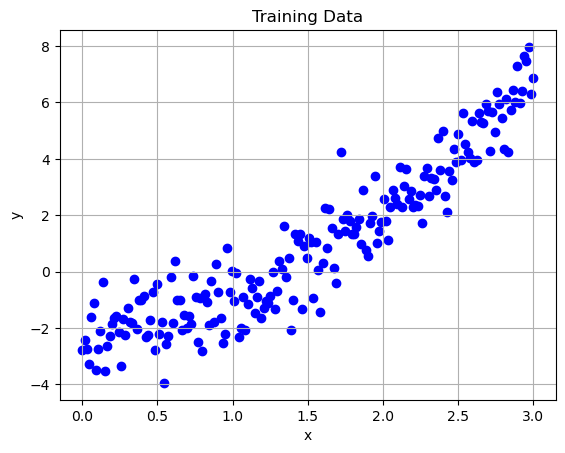

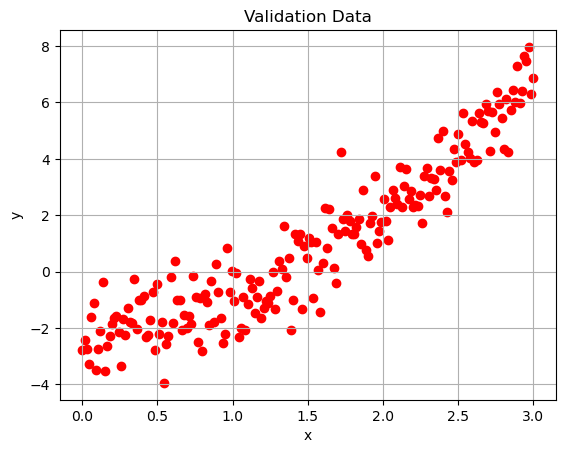

In [75]:
plot_data(X_train,Y_train, 'blue', 'Training Data')
plot_data(X_train,Y_train, 'red', 'Validation Data')

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 14.5262 - val_loss: 13.1017
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.1991 - val_loss: 11.9794
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.0615 - val_loss: 11.0176
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.0856 - val_loss: 10.1928
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.2477 - val_loss: 9.4849
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.5276 - val_loss: 8.8768
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.9082 - val_loss: 8.3538
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.3748 - val_loss: 7.9033
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.9147 - val_loss: 7.5149
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.5172 - val_loss: 7.1793
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.1733 - val_loss: 6.8888
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.875

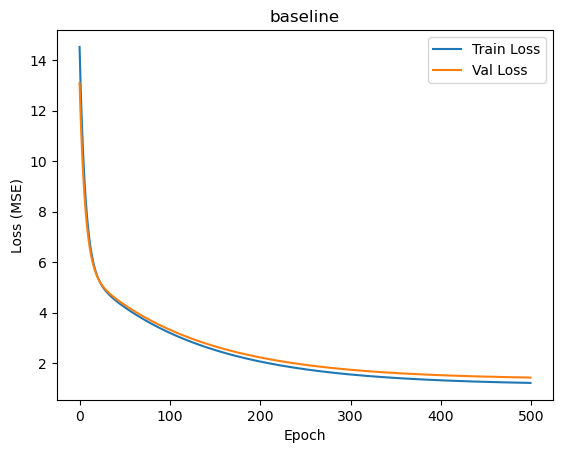

In [76]:
model = create_baseline_model()
history = model.fit(X_train, Y_train, batch_size=X_train.shape[0],
                   epochs = 500,
                   validation_data=(X_val,Y_val))
plot_history(history, 'baseline')

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 7.2478 - val_loss: 6.3816
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.3585 - val_loss: 5.7023
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.6571 - val_loss: 5.1912
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.1255 - val_loss: 4.8495
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.7666 - val_loss: 4.6274
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.5304 - val_loss: 4.4681
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.3600 - val_loss: 4.3434
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.2271 - val_loss: 4.2364
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.1143 - val_loss: 4.1366
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.0109 - val_loss: 4.0407
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.9136 - val_loss: 3.9474
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.8197 - val_l

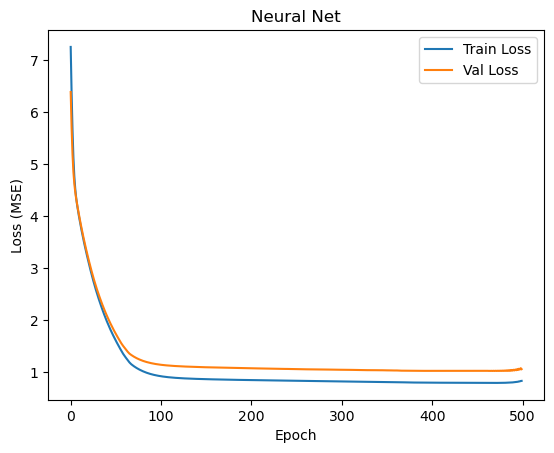

In [77]:
model2 = create_nn_model()
history = model2.fit(X_train, Y_train, batch_size=X_train.shape[0], epochs=500, validation_data=(X_val, Y_val))
plot_history(history, "Neural Net")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


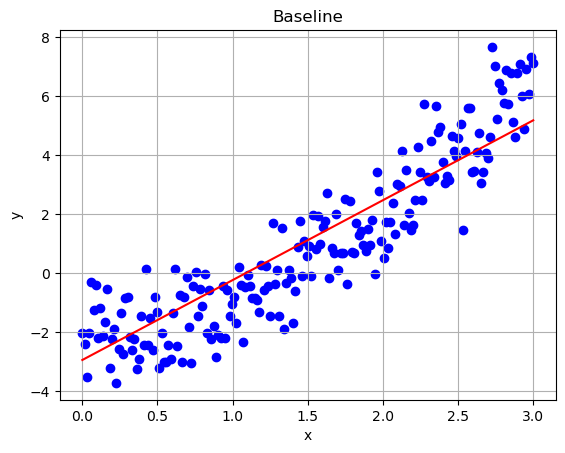

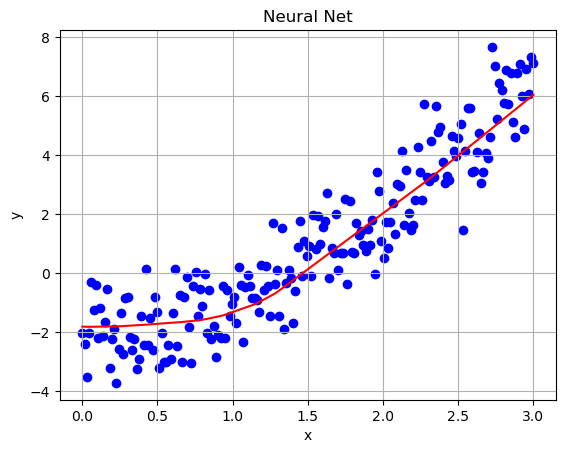

In [78]:
plot_results(X_val, Y_val, model.predict(X_val), "Baseline")
plot_results(X_val, Y_val, model2.predict(X_val), "Neural Net")

plt.show()

# CNN classifier

In [80]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 186s 1us/step


In [82]:
def plot_sample(train_images, train_labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i])
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

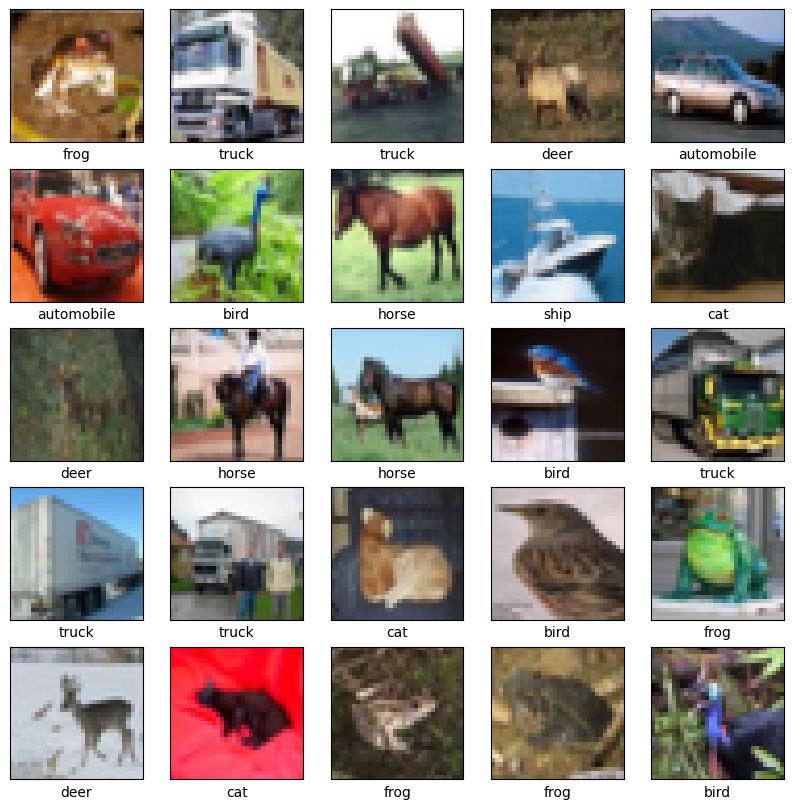

In [83]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plot_sample(train_images, train_labels, class_names)

In [84]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')


def create_model_flatten():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model


def create_model_cnn():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

/Users/davidemorgante/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2778 - loss: 2.0183 - val_accuracy: 0.3700 - val_loss: 1.7987
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3642 - loss: 1.7882 - val_accuracy: 0.3935 - val_loss: 1.7264
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3811 - loss: 1.7308 - val_accuracy: 0.4020 - val_loss: 1.6986
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3910 - loss: 1.7045 - val_accuracy: 0.4031 - val_loss: 1.6852
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3974 - loss: 1.6850 - val_accuracy: 0.4072 - val_loss: 1.6782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4021 - loss: 1.6695 - val_accuracy: 0.4062 - val_loss: 1.6747
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4086 - loss: 1.6584 - val_accuracy: 0.4077 - val_loss: 1.6674
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4087 - loss: 1.6489 - 

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3476 - loss: 1.7594 - val_accuracy: 0.5614 - val_loss: 1.2354
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5739 - loss: 1.1959 - val_accuracy: 0.6139 - val_loss: 1.1008
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6419 - loss: 1.0233 - val_accuracy: 0.6389 - val_loss: 1.0345
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6811 - loss: 0.9212 - val_accuracy: 0.6602 - val_loss: 0.9977
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7069 - loss: 0.8466 - val_accuracy: 0.6671 - val_loss: 0.9782
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7265 - loss: 0.7889 - val_accuracy: 0.6702 - val_loss: 0.9746
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7450 - loss: 0.7374 - val_accuracy: 0.6828 - val_loss: 0.9474
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7580 -

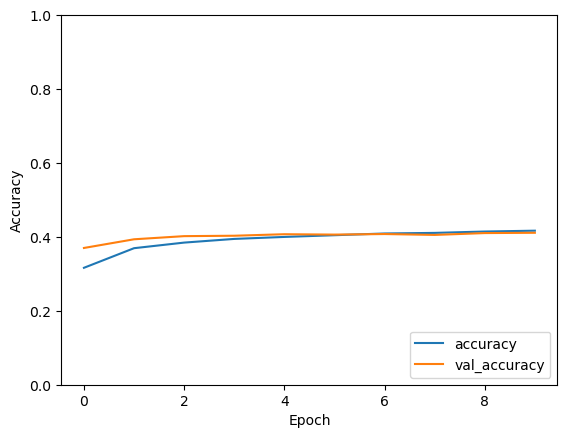

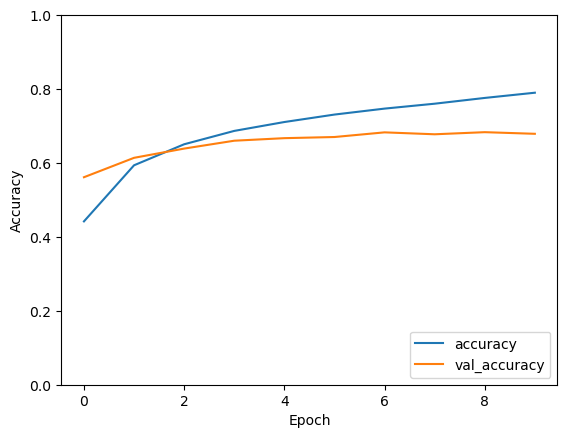

In [85]:
model1 = create_model_flatten()
model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model1.summary()
history = model1.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print(f"Test loss {test_loss} - test accuracy {test_acc}")
plot_history(history)

model2 = create_model_cnn()
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()
history = model2.fit(train_images, train_labels, epochs=10,
                     validation_data=(test_images, test_labels))
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f"Test loss {test_loss} - test accuracy {test_acc}")
plot_history(history)
plt.show()

# Deep convolutional GAN

In [87]:
import time

In [88]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [89]:
train_images = train_images.reshape(
    train_images.shape[0], 28, 28, 1).astype('float32')
# Normalize the images to [-1, 1]
train_images = (train_images - 127.5) / 127.5

In [90]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [91]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(
    train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [92]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    model.add(tf.keras.layers.Conv2DTranspose(
        128, (5, 5), strides=(1, 1), padding='same', use_bias=False))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(
        64, (5, 5), strides=(2, 2), padding='same', use_bias=False))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(
        2, 2), padding='same', use_bias=False, activation='tanh'))

    return model


def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(
        128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))

    return model


def generate_and_save_images(generator, discriminator, epoch, test_input):
    predictions = generator(test_input, training=False)
    decisions = discriminator(predictions)

    fig = plt.figure(figsize=(10, 10))
    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.title(f"{decisions.numpy()[i,0]:.2f}")
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))



In [94]:
generator = make_generator_model()
discriminator = make_discriminator_model()
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [95]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [96]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [97]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 25

# You will reuse this seed overtime
seed = tf.random.normal([num_examples_to_generate, noise_dim])

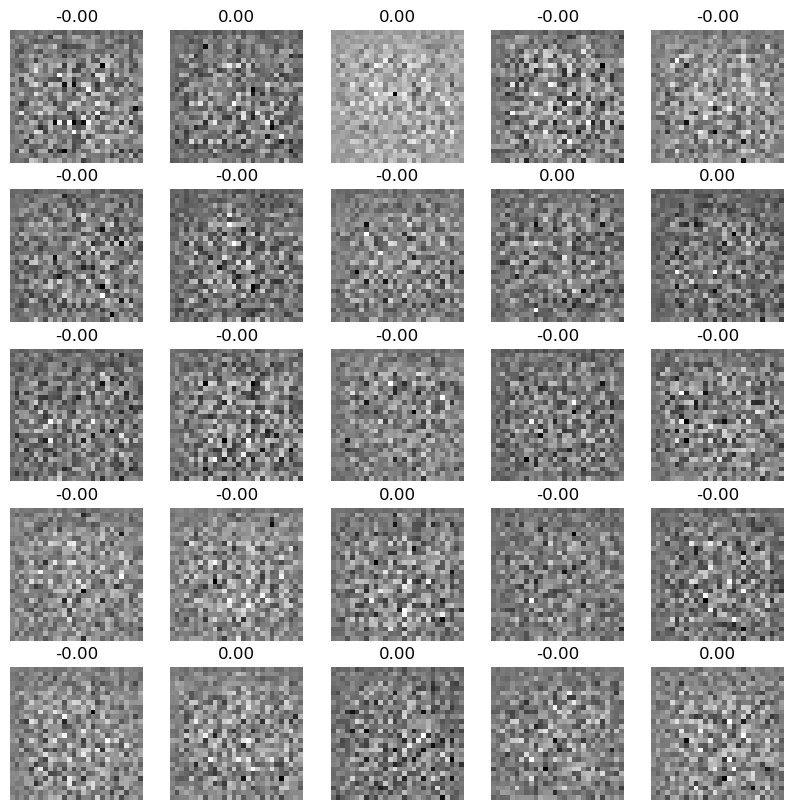

In [98]:
generate_and_save_images(generator, discriminator, -1, seed)

In [100]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(
        zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(
        zip(gradients_of_discriminator, discriminator.trainable_variables))


def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as you go
        generate_and_save_images(generator, discriminator,
                                 epoch + 1,
                                 seed)

        print('Time for epoch {} is {} sec'.format(
            epoch + 1, time.time()-start))
         
        # Generate after the final epoch
        generate_and_save_images(generator, discriminator,
                             epochs,
                             seed)

2025-01-12 18:22:57.450943: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Time for epoch 1 is 127.41320300102234 sec


2025-01-12 18:24:58.940409: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Time for epoch 2 is 121.55774426460266 sec
Time for epoch 3 is 119.96359181404114 sec


2025-01-12 18:29:03.824789: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Time for epoch 4 is 123.97035908699036 sec
Time for epoch 5 is 119.71298384666443 sec
Time for epoch 6 is 123.39630889892578 sec
Time for epoch 7 is 119.9315538406372 sec


2025-01-12 18:37:06.574010: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Time for epoch 8 is 118.10852408409119 sec
Time for epoch 9 is 118.68650698661804 sec
Time for epoch 10 is 120.97094988822937 sec


/var/folders/_b/ws1r29zn39n0fsh73lx6lg_00000gn/T/ipykernel_72369/2929773079.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 10))


Time for epoch 11 is 122.2839560508728 sec
Time for epoch 12 is 119.31200194358826 sec
Time for epoch 13 is 118.64699697494507 sec
Time for epoch 14 is 118.53811001777649 sec
Time for epoch 15 is 117.44852304458618 sec


KeyboardInterrupt: 

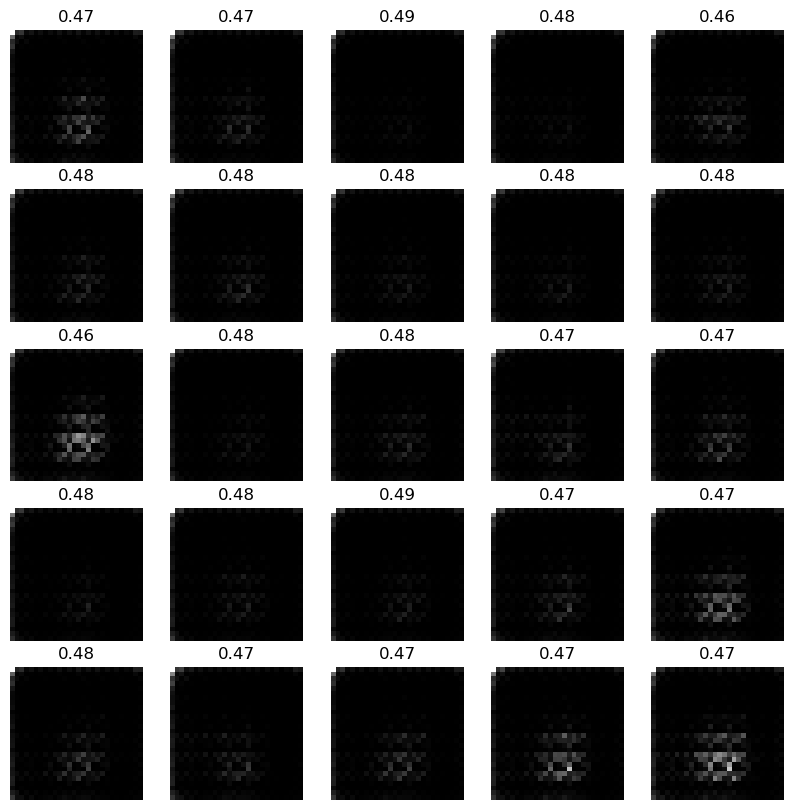

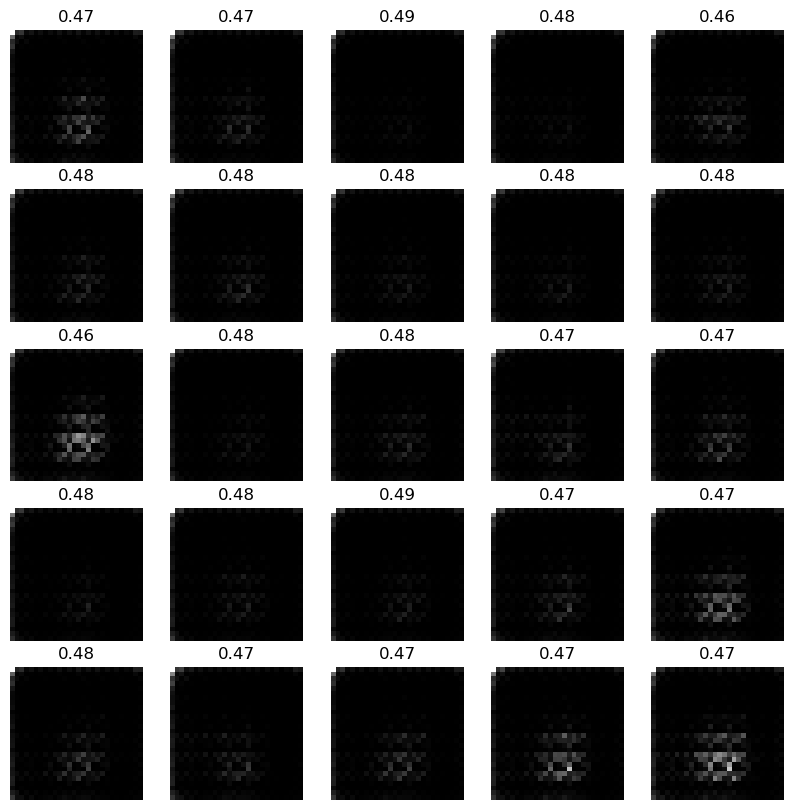

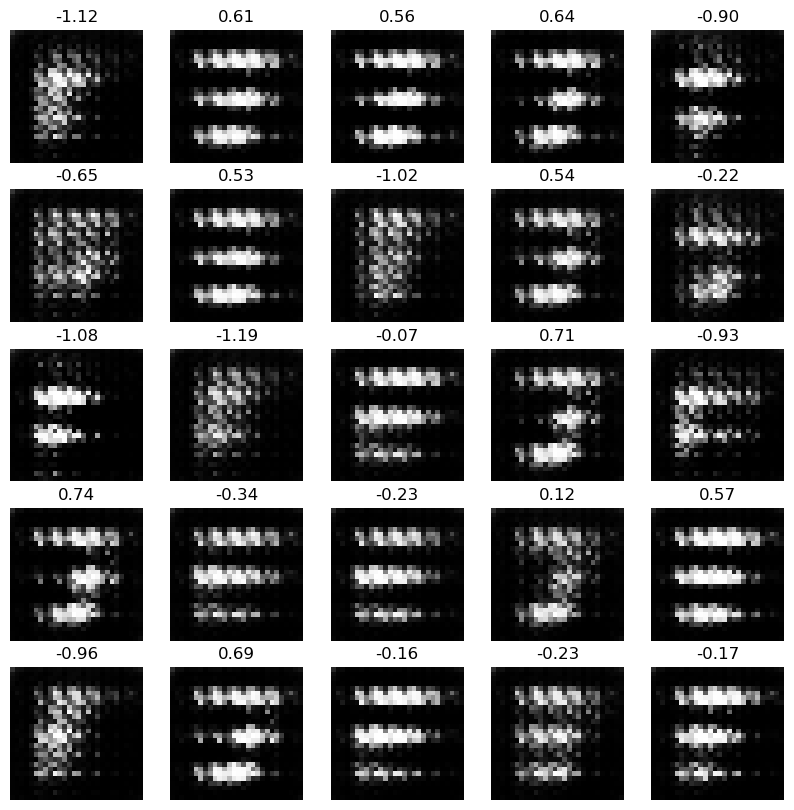

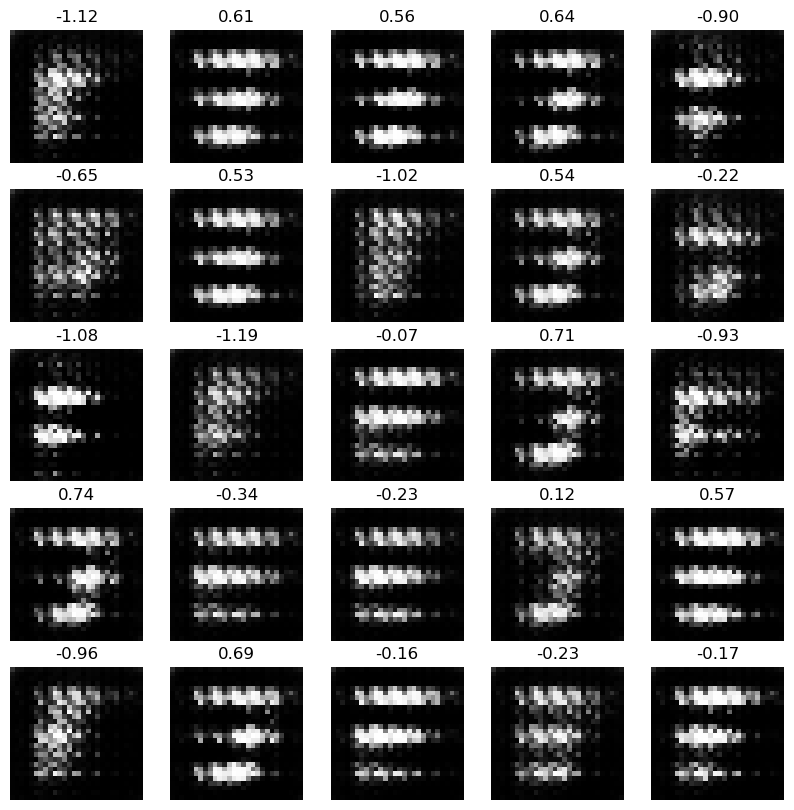

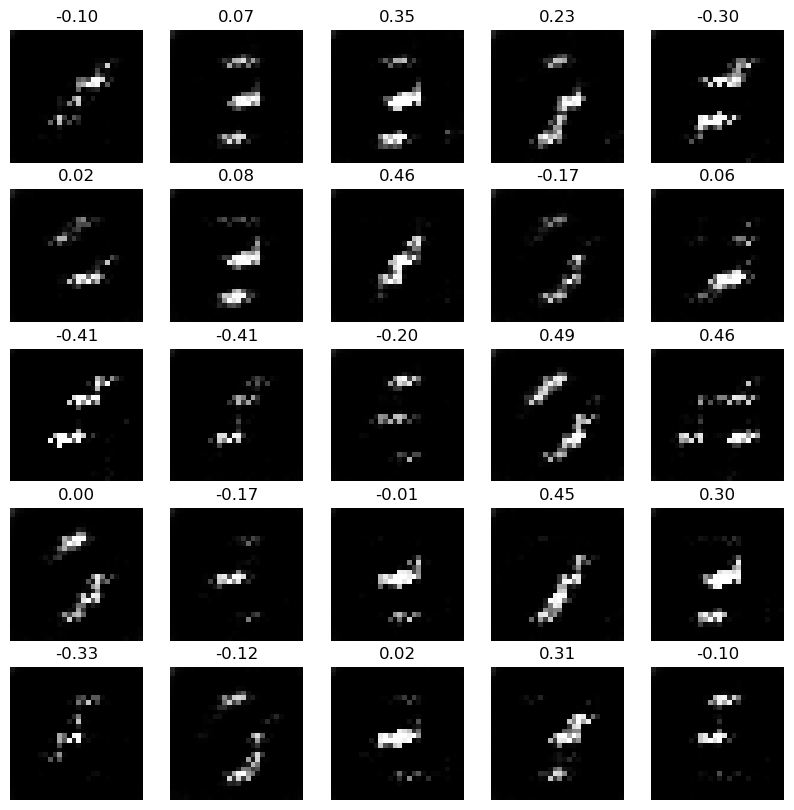

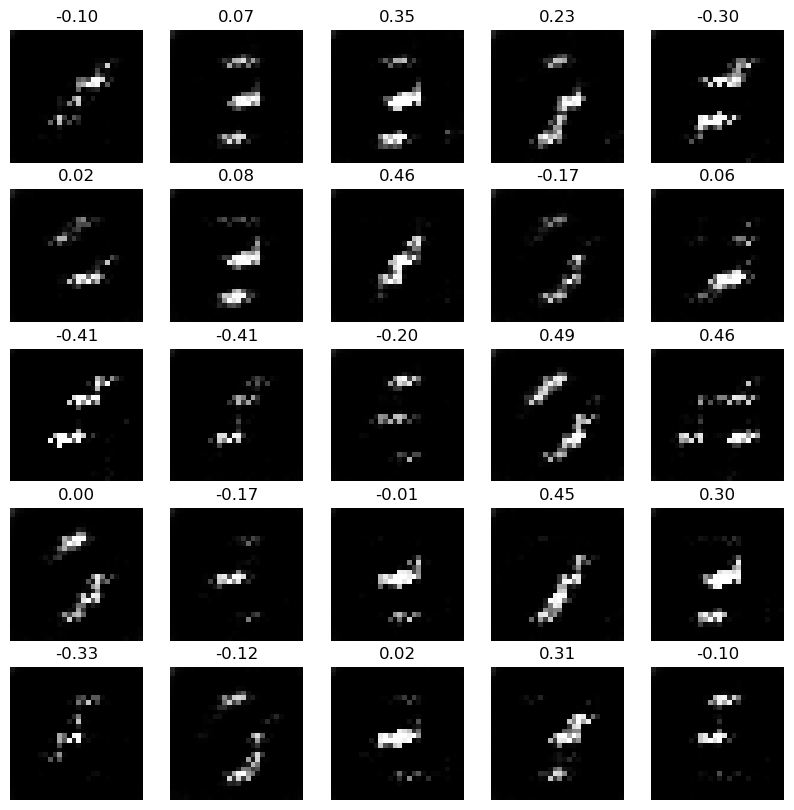

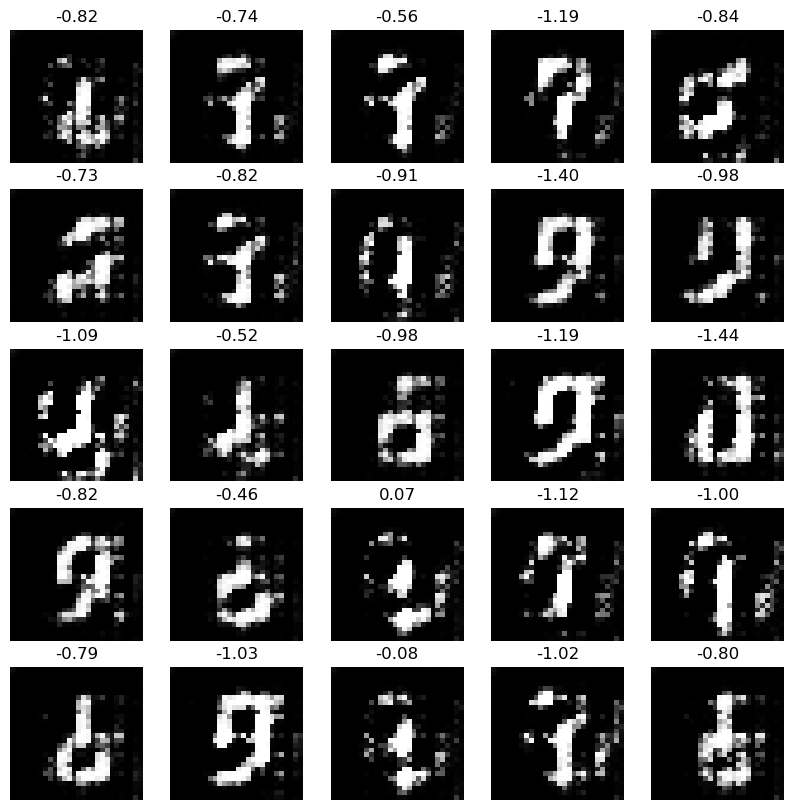

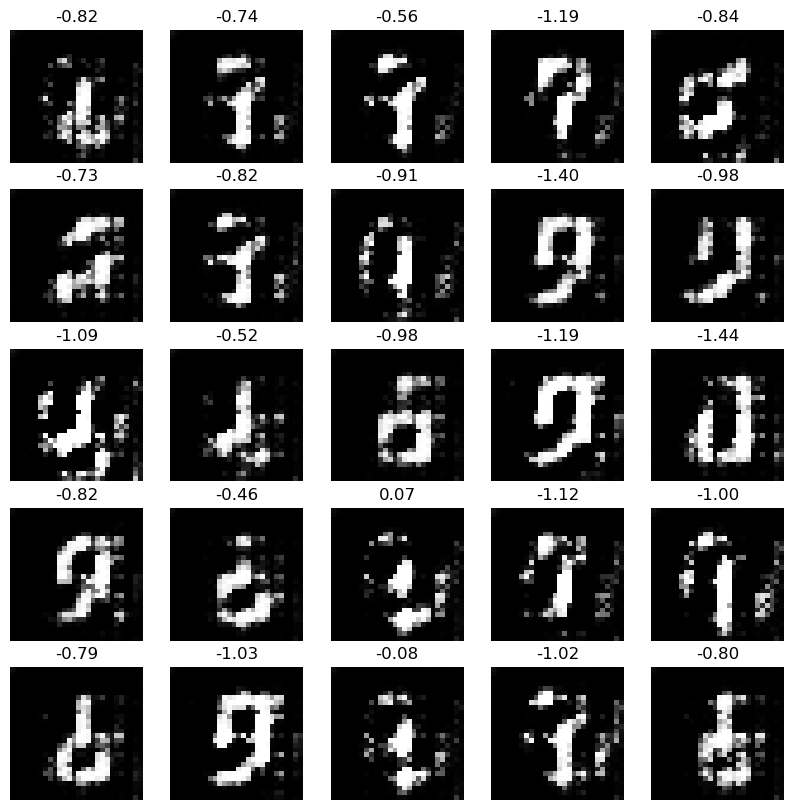

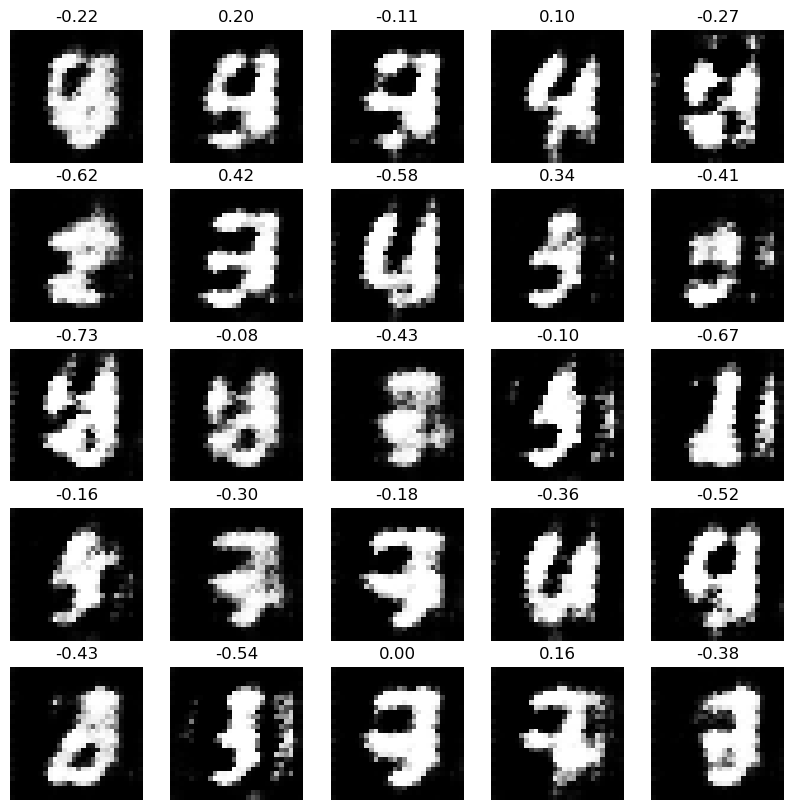

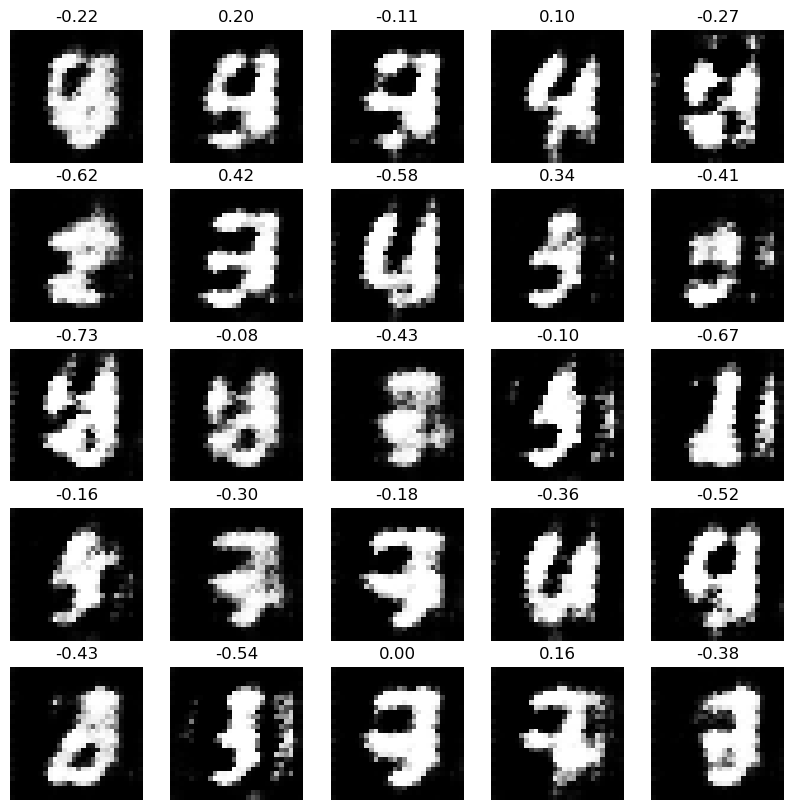

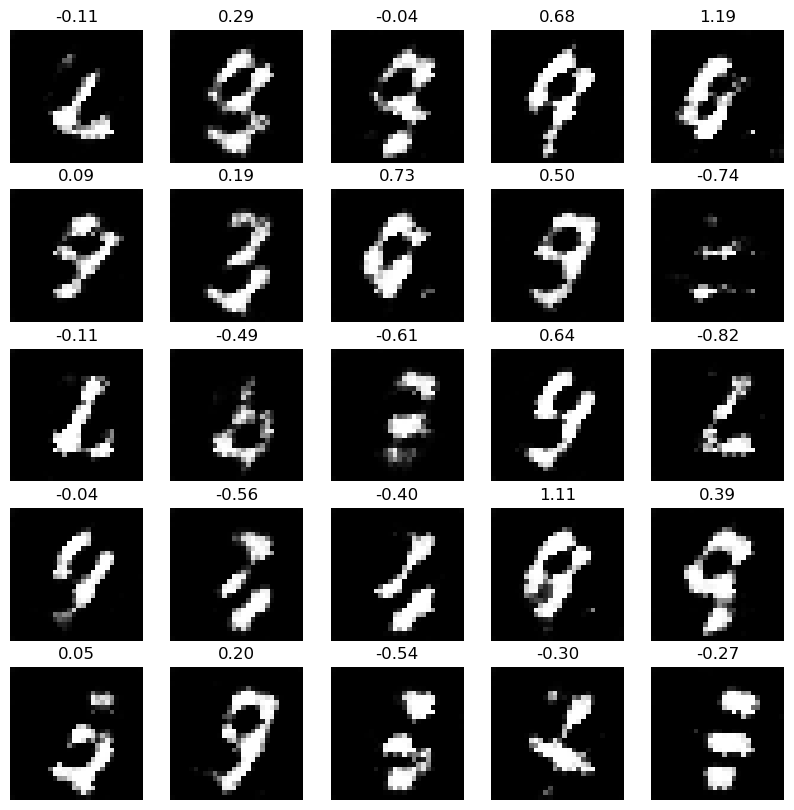

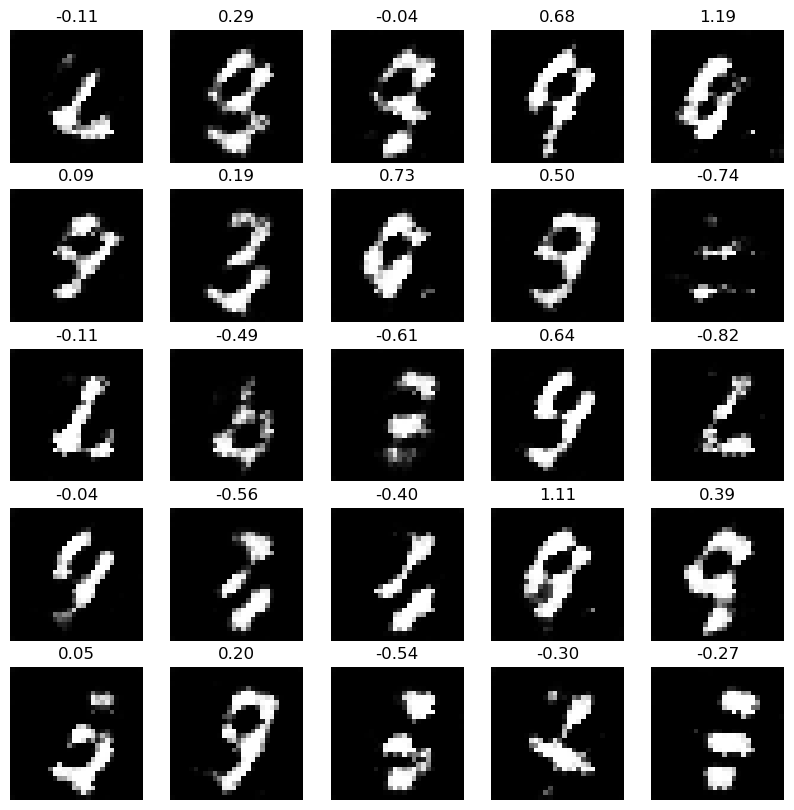

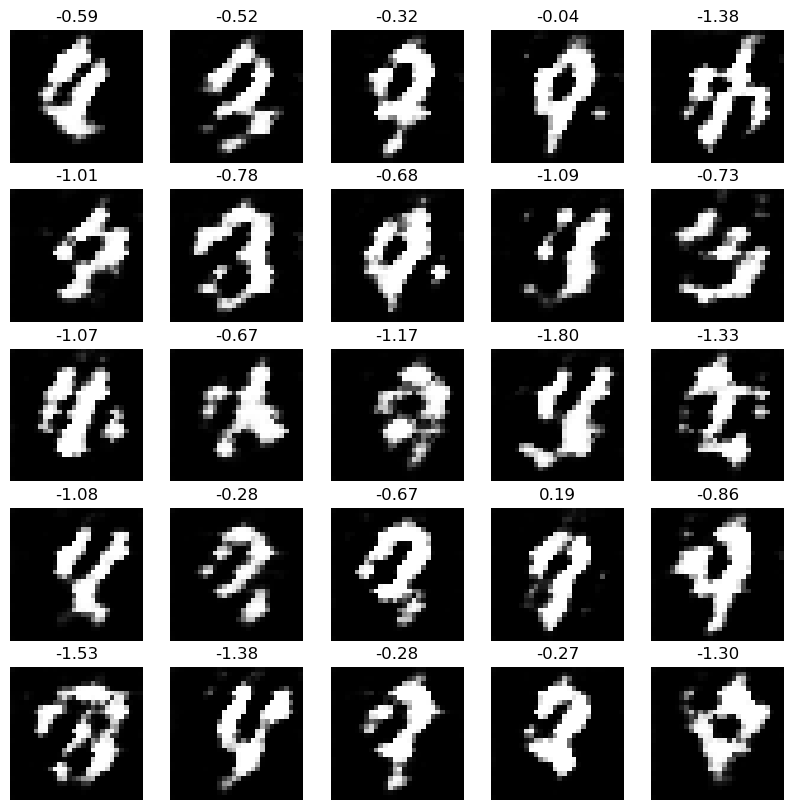

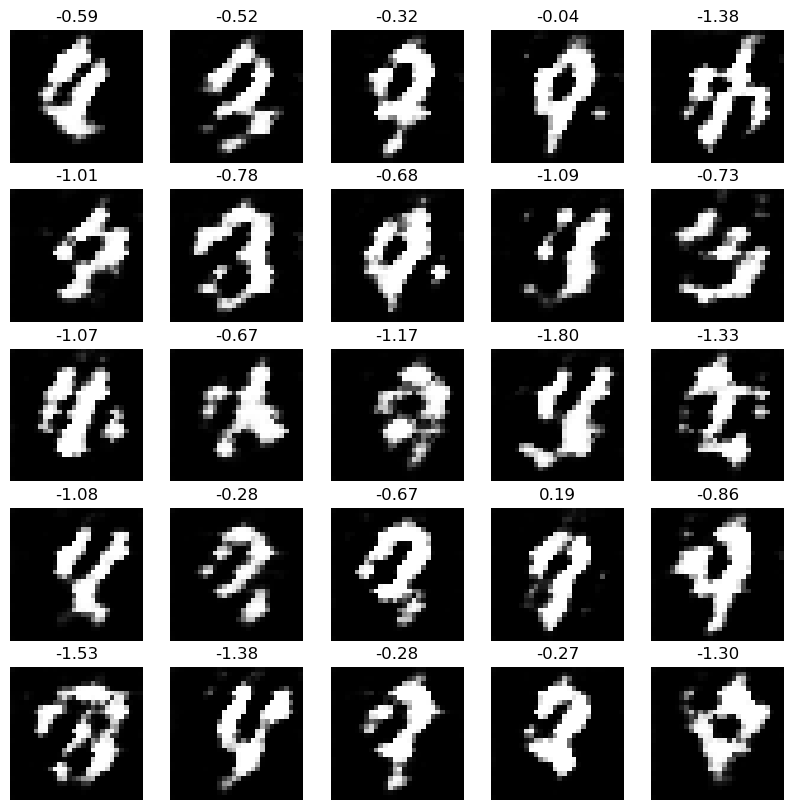

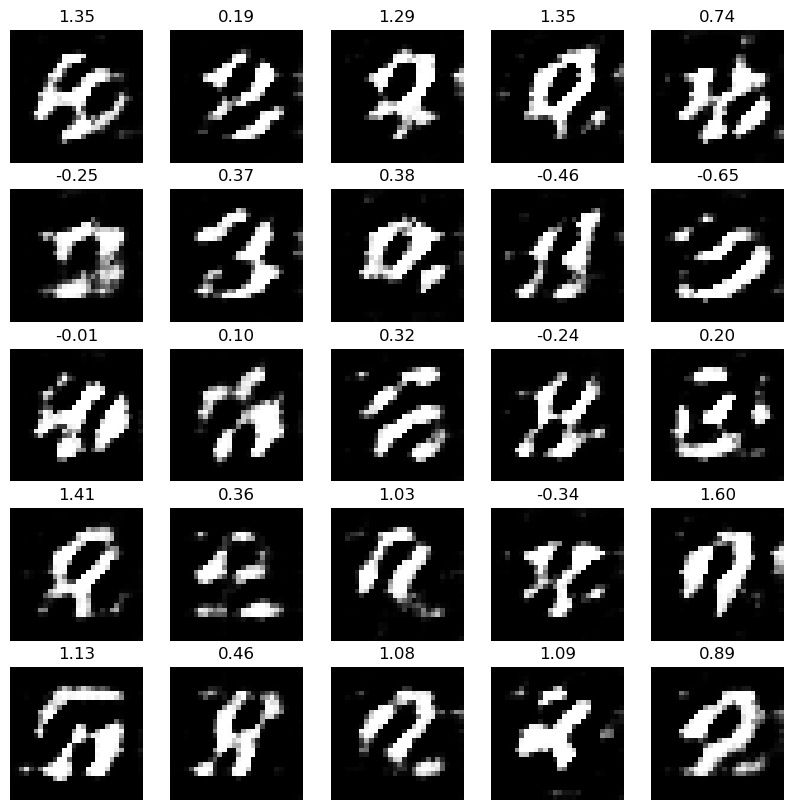

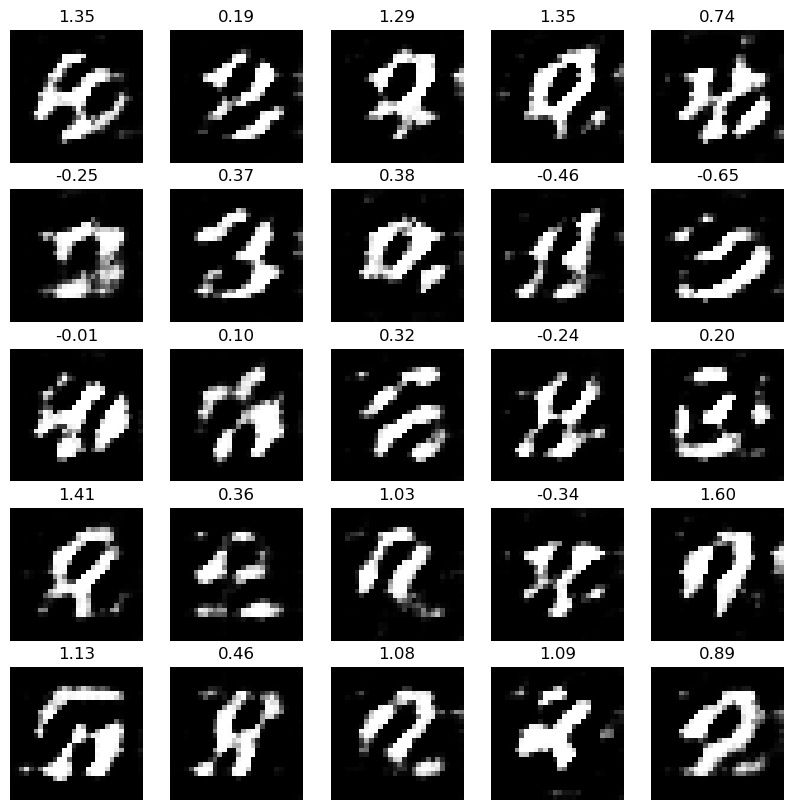

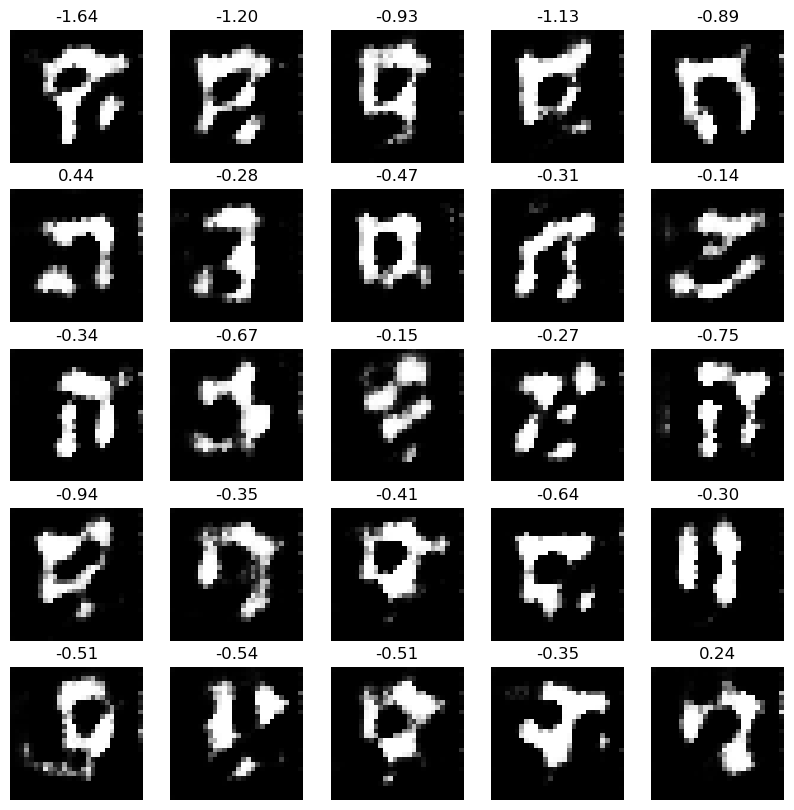

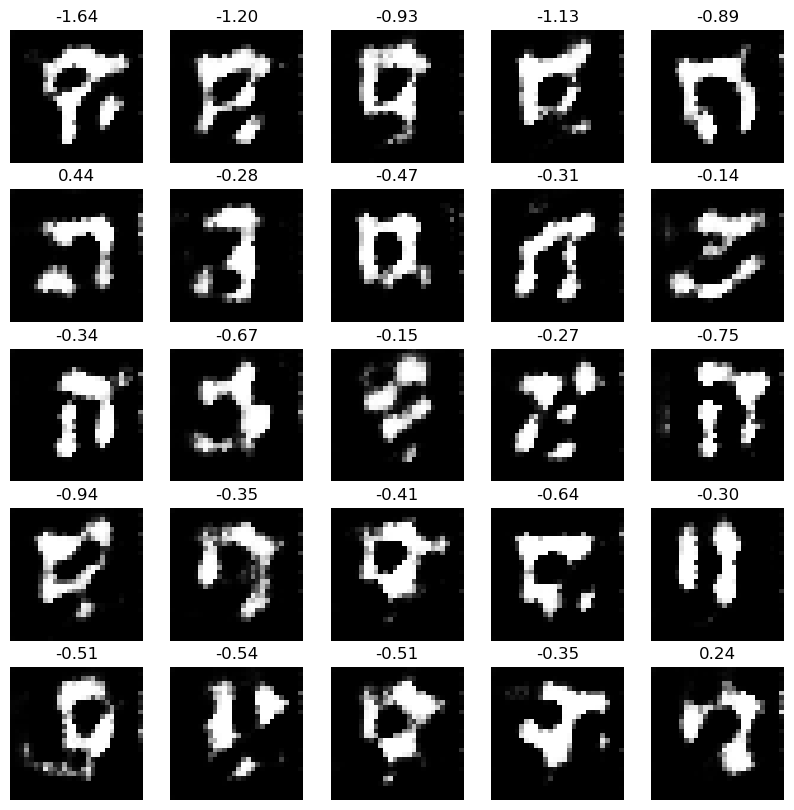

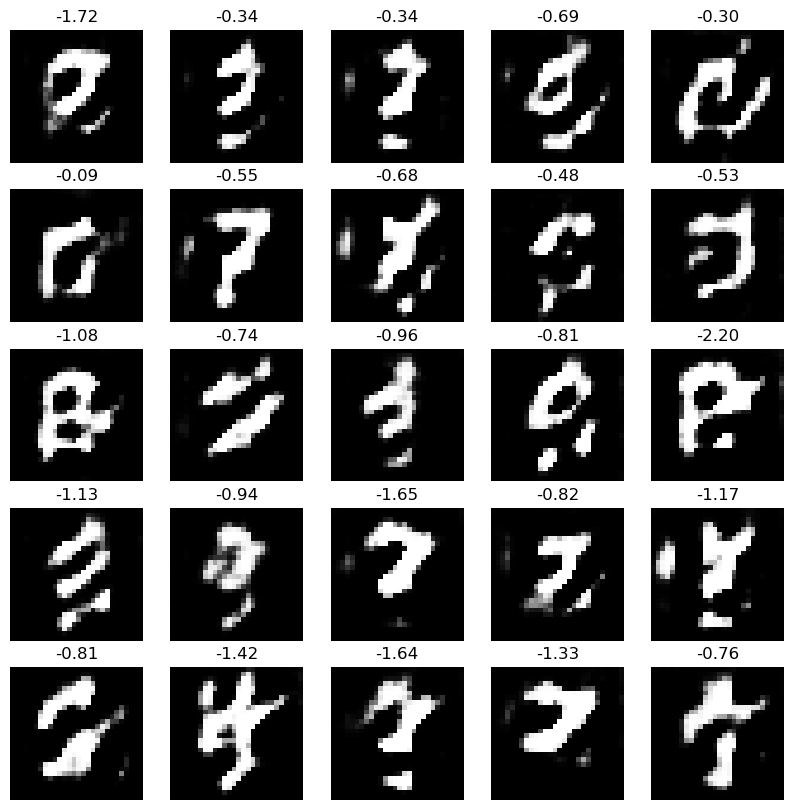

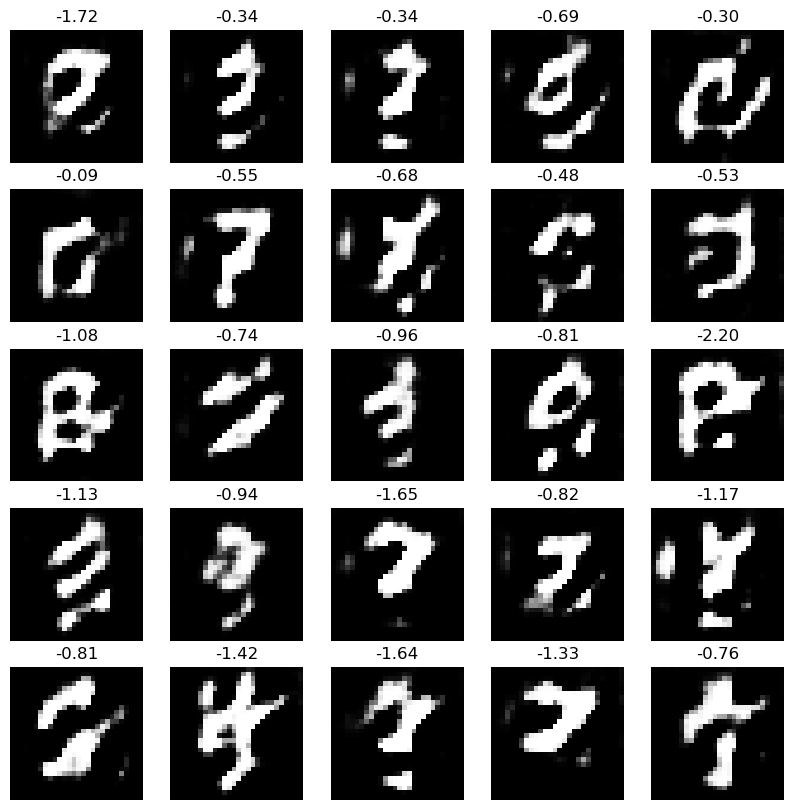

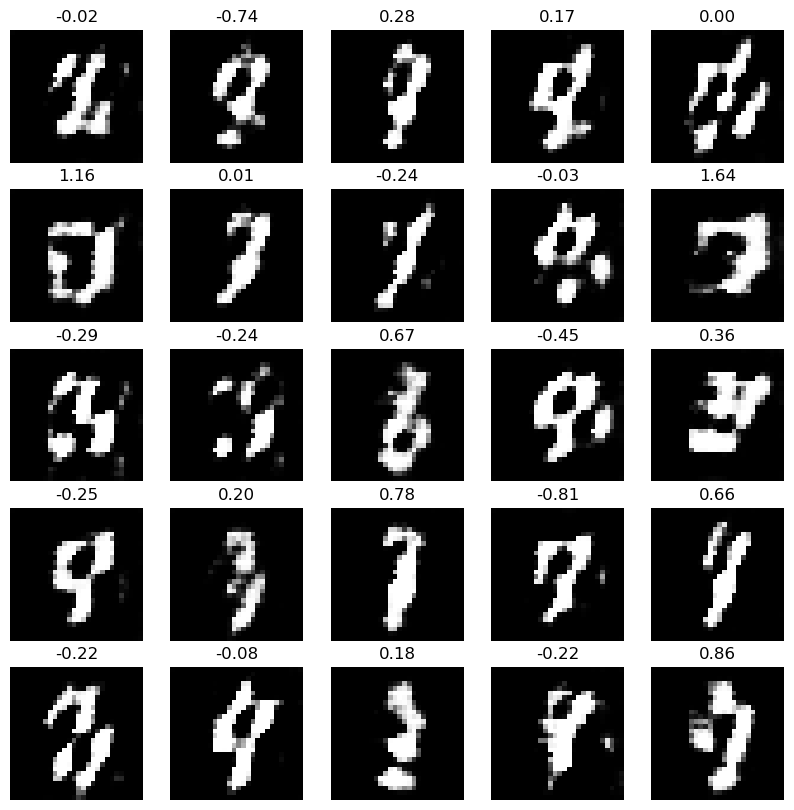

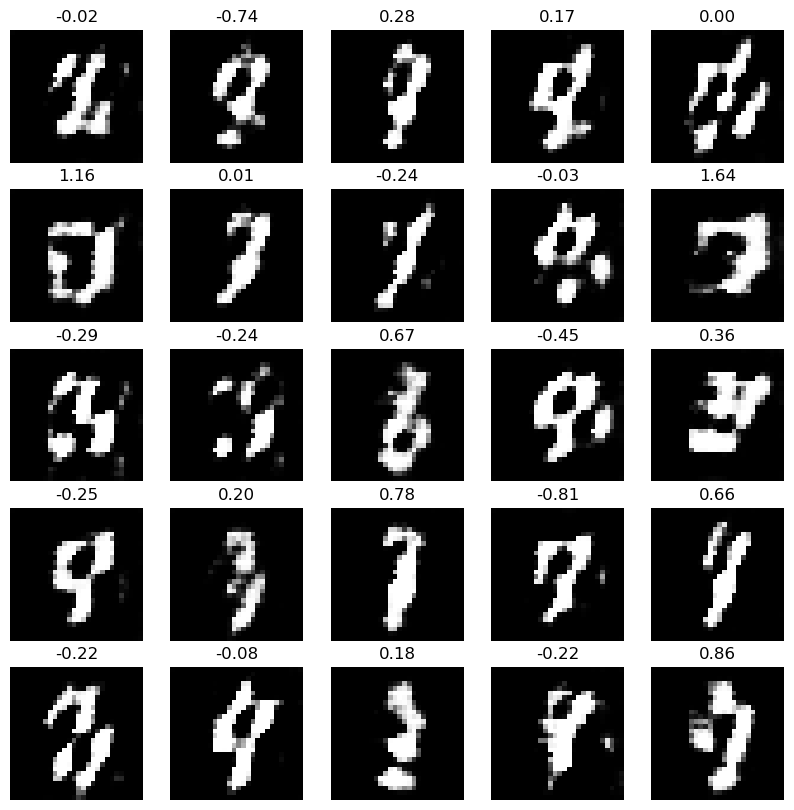

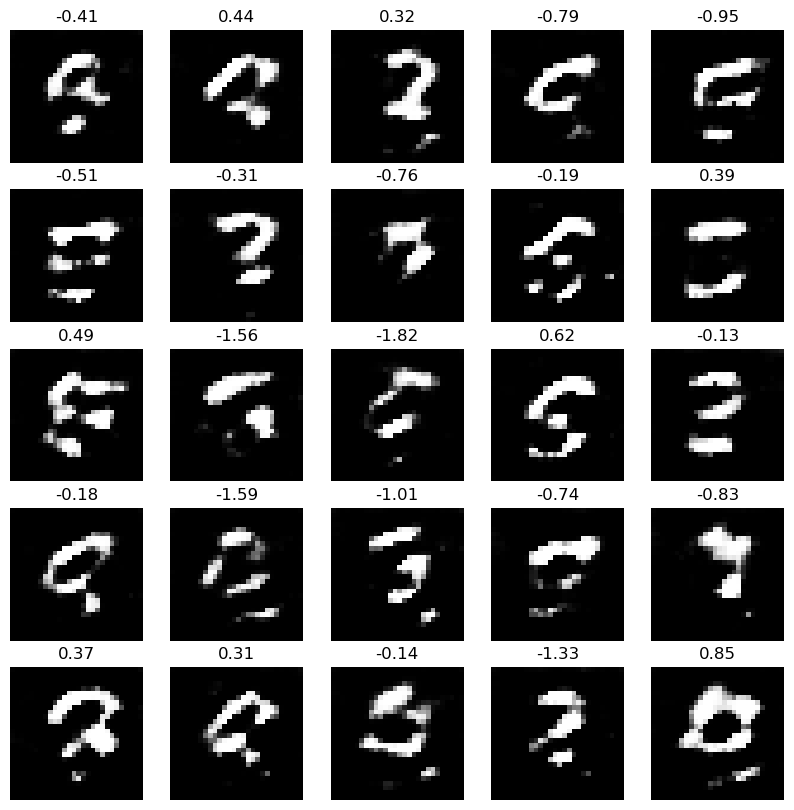

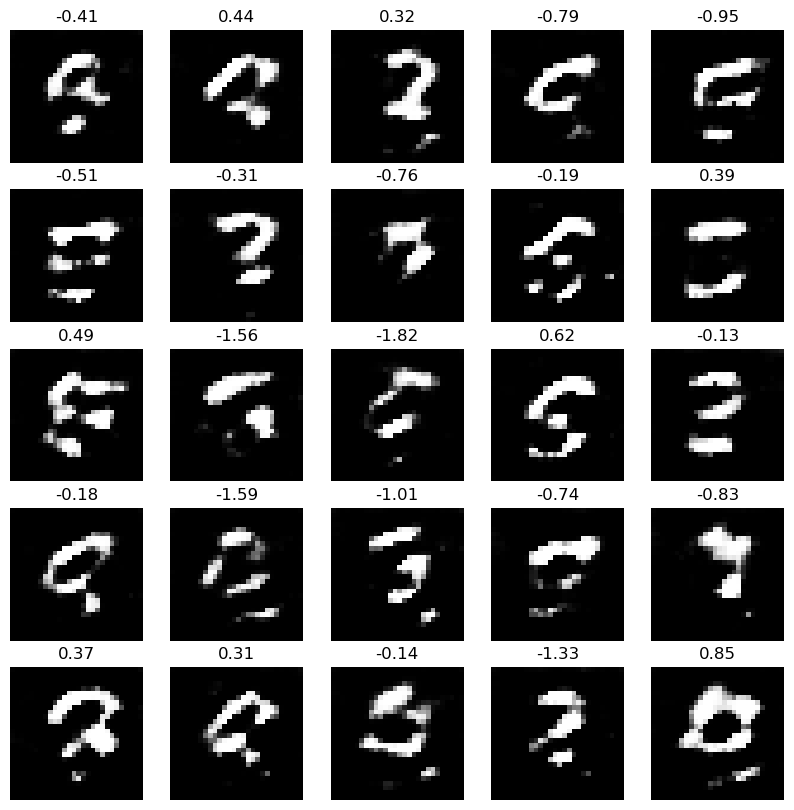

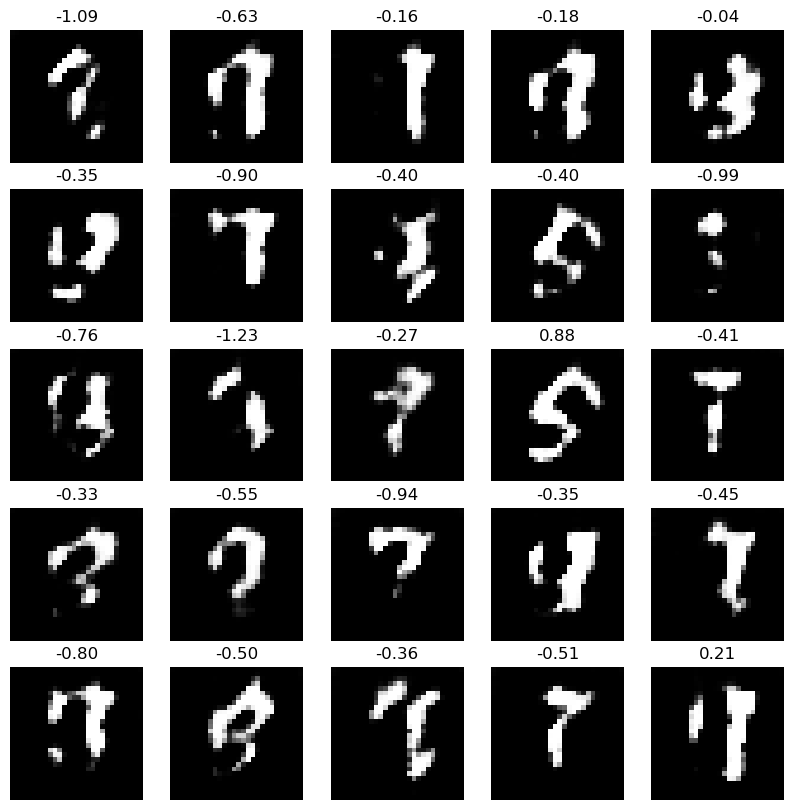

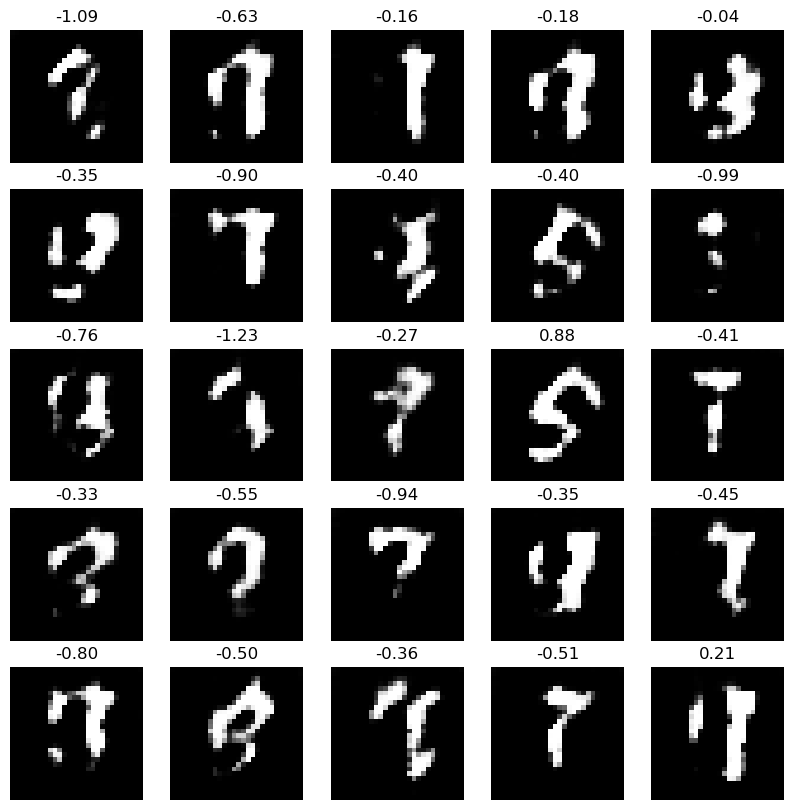

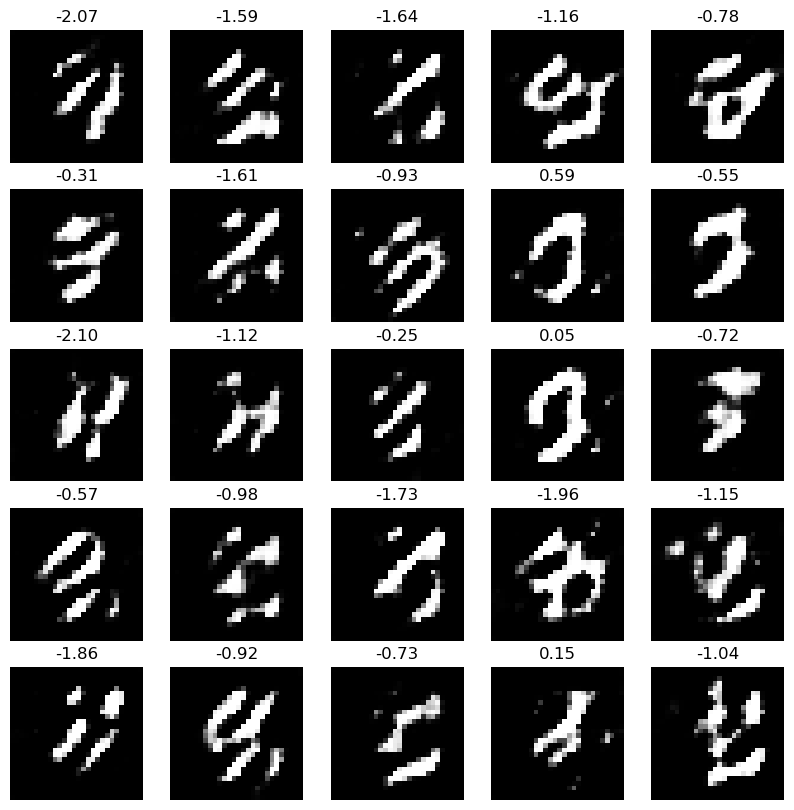

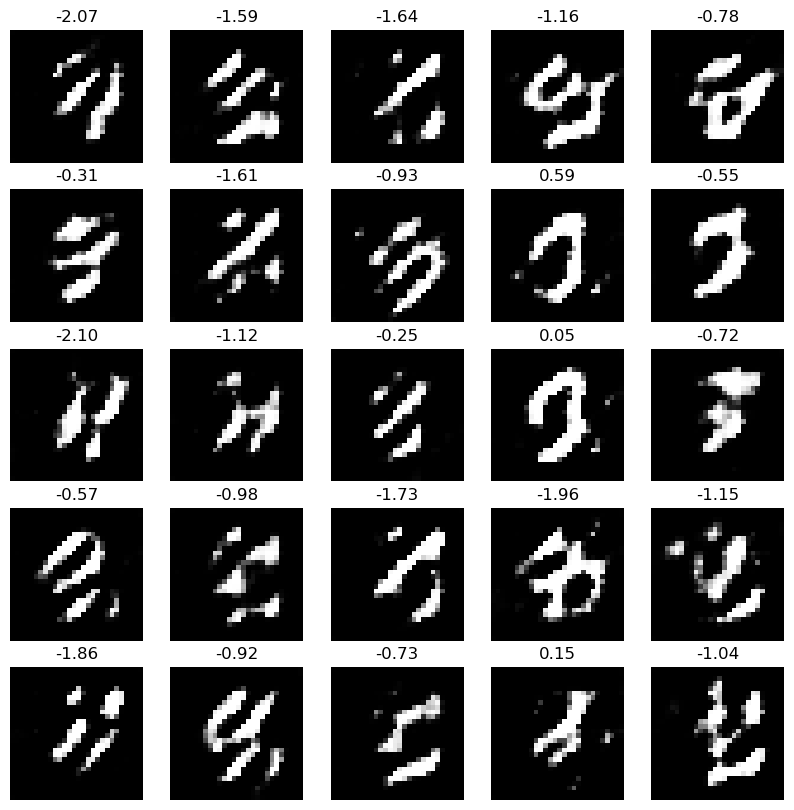

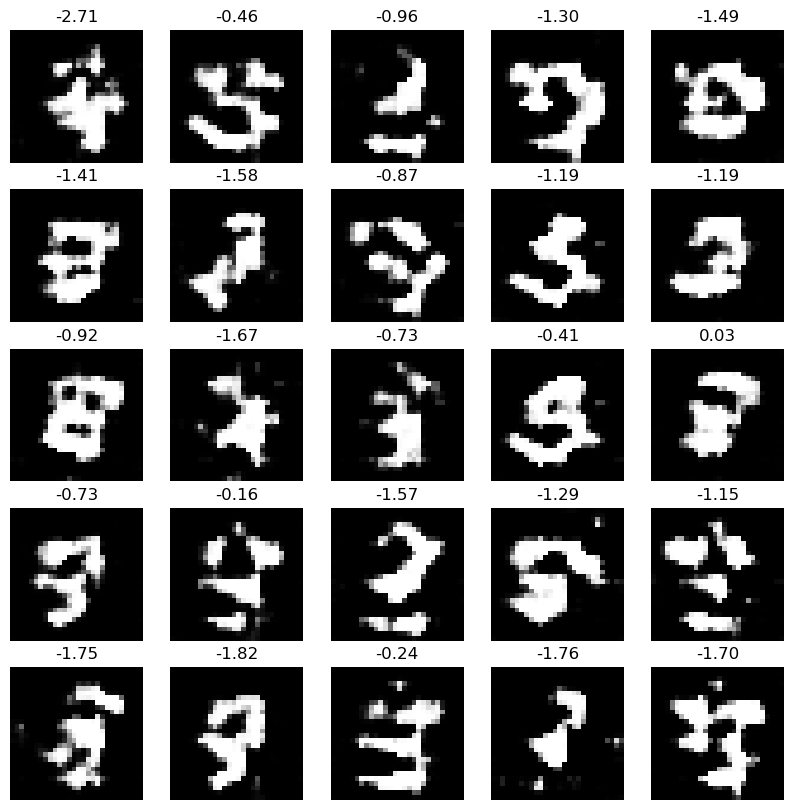

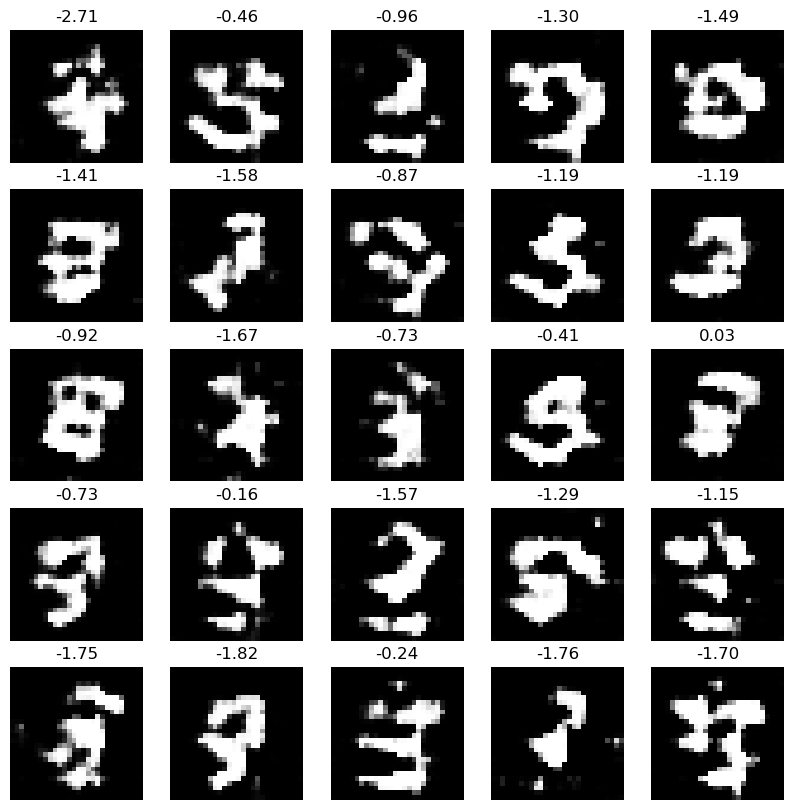

In [101]:
train(train_dataset, EPOCHS)